<a href="https://colab.research.google.com/github/jafetpintle/DataManipulation/blob/main/Capitulo_1_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise 1: Preparing dataser
Loading a sample Dataset and creating the feature matrix and target matrix.

In [ ]:
import pandas as pd
url_dataset = "https://github.com/TrainingByPackt/Data-Science-with-Python/blob/master/Chapter01/Data/USA_Housing.csv?raw=true"
df = pd.read_csv(url_dataset, header=0)

In [ ]:
#Print columns
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
#Print number of rows
df.index

RangeIndex(start=0, stop=5000, step=1)

When we can select specific rows or collumns, we can use **iloc or loc**, the diference is iloc use the index, for example **df.iloc[5:0]** and loc the index names as **df.iloc[0:4 , ["Avg. Area Income", "Avg. Area House Age"]]]**

In [ ]:
#print the first four rows of the tree first columns
df.iloc[0:4 , 0:3]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms
0,79545.458574,5.682861,7.009188
1,79248.642455,6.002900,6.730821
2,61287.067179,5.865890,8.512727
3,63345.240046,7.188236,5.586729


In this dataset, our target will be to predict the price of houses, so, we need to create a new datasat without the prices, and a variable where we going to save the prices houses.

In [ ]:
X = df.drop('Price', axis=1)
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,USNS Raymond\nFPO AE 09386


In [ ]:
X.shape

(5000, 6)

In [ ]:
y = df['Price']
y.head(10)

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
5    1.068138e+06
6    1.502056e+06
7    1.573937e+06
8    7.988695e+05
9    1.545155e+06
Name: Price, dtype: float64

We had create two new datasets, and we're goin to use it to make a predict model.

#Exercise 2: Data cleaning

In [ ]:
import pandas as pd
df = pd.read_csv('https://github.com/TrainingByPackt/Data-Science-with-Python/blob/master/Chapter01/Data/Banking_Marketing.csv?raw=true', header=0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
#Printing the datatypes of each columns
df.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [ ]:
#Looking for missing values for each columns
df.isna().sum()

age               2
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           6
month             0
day_of_week       0
duration          7
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [ ]:
#Removing null values
df = df.dropna()

In [ ]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

#Exercise 3: Imputation
Imputation in cleaning data

In the case of numerical data, we can compute its mean or median and use the result to replace missing values. In the case of the categorical (non-numerical) data, we can compute its mode to replace the missing value. This is known as **imputation**.

In [ ]:
import pandas as pd
url_dataset = 'https://github.com/TrainingByPackt/Data-Science-with-Python/blob/master/Chapter01/Data/Banking_Marketing.csv?raw=true'
df = pd.read_csv(url_dataset, header =0)

In [ ]:
#Mean of age
mean_age = df['age'].mean()
print('mean age:',mean_age)

mean age: 40.023812413525256


We are going to fill missing age values with the mean, to do this, you can use **fillna** method.

In [ ]:
df['age'].fillna(mean_age, inplace=True)

In [ ]:
#Imput median in duration missing values
median_duration = df.duration.median()
print('Median duration:',median_duration)

Median duration: 180.0


In [ ]:
df['duration'].fillna(median_duration, inplace=True)

We have a categorical missing values, when we have this, we can use the **mode** function. The mode of a set of values is the **value that appears most often**.

In [ ]:
na_values = df.isna().sum()
na_values[na_values > 0]

contact    6
dtype: int64

In [ ]:
mode_contact = df['contact'].mode()[0]
print('mode contact:',mode_contact)

mode contact: cellular


In [ ]:
#Imput the missing values
df.contact.fillna(mode_contact, inplace=True)

#Exercise 4: Outliers
Finding and removing outliers in Data.


We need to know that:

* Q2 -> The middle of data
* Q1 -> The lower quartile is the middle values of the firts half of data
* Q3 -> The upper quartile is the middle value of the second half of dataset

IQR is the Intercuartile range
$$IQR = Q3 - Q1$$ 

Any data points lower than the lower fence and greater than the upper fence are **outliers**.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
link = 'https://github.com/TrainingByPackt/Data-Science-with-Python/blob/master/Chapter01/Data/german_credit_data.csv?raw=true'
df = pd.read_csv(link, header = 0)
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


We are go too look for outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


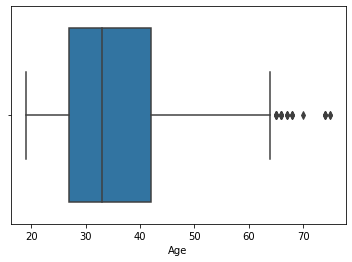

In [ ]:
sns.boxplot(df['Age'])

In [ ]:
df.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [ ]:
#Calculing IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
print('IQR:',IQR) 

IQR: 15.0


In [ ]:
#Calculing the upper fence and the lower fance
Upper_fence = Q3 + (1.5*IQR)
Lower_fence = Q1 - (1.5*IQR)
print('Upper fence:', Upper_fence)
print('Lower fence:', Lower_fence)

Upper fence: 64.5
Lower fence: 4.5


In [ ]:
#Print all the upper  fence and the lower fence data of dataset
df[(df['Age'] > Upper_fence) | (df['Age'] < Lower_fence)]

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
75,75,66,male,3,free,little,little,1526,12,car
137,137,66,male,1,own,quite rich,moderate,766,12,radio/TV
163,163,70,male,3,free,little,moderate,7308,10,car
179,179,65,male,2,own,little,little,571,21,car
186,186,74,female,3,free,little,moderate,5129,9,car
187,187,68,male,0,free,little,moderate,1175,16,car
213,213,66,male,3,own,little,rich,1908,30,business
330,330,75,male,3,free,little,little,6615,24,car
430,430,74,male,1,own,little,NaN,3448,5,business


In [ ]:
#Filter  out the outliers and priny only the potential data.To do so,
# just negate the preceding result using the ~ operator.

df = df[~((df['Age'] < Lower_fence) | (df['Age'] > Upper_fence))]
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


#Exercise 5: Integration Data.
Data integration is bring data together in one place. To do data integration, we can merge multiple pandas DataFrames.

In [ ]:
import pandas as pd

data_student = 'https://github.com/TrainingByPackt/Data-Science-with-Python/blob/master/Chapter01/Data/student.csv?raw=true'
data_mark = 'https://github.com/TrainingByPackt/Data-Science-with-Python/blob/master/Chapter01/Data/mark.csv?raw=true'

df_student = pd.read_csv(data_student, header=0)
df_mark = pd.read_csv(data_mark, header=0)

In [ ]:
df_student.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no


In [ ]:
df_mark.head()

,Student_id,Mark,City
0,1,95,Chennai
1,2,70,Delhi
2,3,98,Mumbai
3,4,75,Pune
4,5,89,Kochi


**Student_id** is common to both datasets. Perform data integration on both the 
DataFrames with respect to the **Student_id** column using the **pd.merge() **

In [ ]:
df = pd.merge(df_student,df_mark, on = 'Student_id')
df.head()

,Student_id,Age,Gender,Grade,Employed,Mark,City
0,1,19,Male,1st Class,yes,95,Chennai
1,2,20,Female,2nd Class,no,70,Delhi
2,3,18,Male,1st Class,no,98,Mumbai
3,4,21,Female,2nd Class,no,75,Pune
4,5,19,Male,1st Class,no,89,Kochi


#Exercise 6: Data **Transformation**

##Types of data
Now, we have a lot of columns that have different types of data. Our goal is 
to transform the data into a machine-learning-digestible format. This beacause all of our machine learning is based on **mathematics**

Data is classified into **numerical** and **categorical** data:

* **Numerical**: Numericas data is quantifiable.
* **Categorical**: The data is a string or non-numeric data tha ir qualitative in nature.

**Numerical** data is further divided into the following:

* **Discrete**: Any numerical data is countable, for example, the number of people in a family. Discrete data only take certain values (1,2,3,4, etc).

* **Continuosus**:Any numerical data that is measurable. Continuous data can take virtually any value (for example , 1.25, 3.8888, or 77.1276).

**Categorical** data is further divided into:
* **Ordered** Any categorical data that has sine irder assicuatedm fir exanokem nivue ratings (excellent, good, bad) and feedback (happy, not bad, bad). Tou can think of **ordered data as being something you could mark on a scale**

* **Nominal**: Any categorical data that has no order. For example, gender oor country.

##Handing categorical Data

To convert categorical variables into numerical, we use **Enconding**. 

With **Replacing** we replace the categorical data with a number

In the next exercise, we're goint to replace categorial cdata into 

In [ ]:
import pandas as pd
import numpy as np
dataset = 'https://github.com/TrainingByPackt/Data-Science-with-Python/blob/master/Chapter01/Data/student.csv?raw=true'

df = pd.read_csv(dataset, header=0)
df.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no


In [ ]:
#Select the categorical columns and separate into a different dataframes
df_categorical = df.select_dtypes(exclude=[np.number])
df_categorical

,Gender,Grade,Employed
0,Male,1st Class,yes
1,Female,2nd Class,no
2,Male,1st Class,no
3,Female,2nd Class,no
4,Male,1st Class,no
...,...,...,...
227,Female,1st Class,no
228,Male,2nd Class,no
229,Male,3rd Class,yes
230,Female,1st Class,yes


In [ ]:
#Uniques values in the grade column
df_categorical['Grade'].unique()

array(['1st Class', '2nd Class', '3rd Class'], dtype=object)

In [ ]:
#Frecuency distribution of grades
df_categorical.Grade.value_counts()

2nd Class    80
3rd Class    80
1st Class    72
Name: Grade, dtype: int64

In [ ]:
#Frecuency distribution of Gender
df_categorical.Gender.value_counts()

Male      136
Female     96
Name: Gender, dtype: int64

In [ ]:
#Frecuency distribution of Employed
df_categorical.Employed.value_counts()

no     133
yes     99
Name: Employed, dtype: int64

In [ ]:
#Replacing grades
df_categorical.Grade.replace({'1st Class':1, '2nd Class':2, '3rd Class':3}, inplace=True)
df_categorical.Grade.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0    1
1    2
2    1
3    2
4    1
Name: Grade, dtype: int64

In [ ]:
#Replacing gender where
#Male = 0 and Female=1
df_categorical.Gender.replace({'Male':0, 'Female':1}, inplace=True)
df_categorical.Gender.head()

0    0
1    1
2    0
3    1
4    0
Name: Gender, dtype: int64

In [ ]:
#Replacing emplyed: no=0 and yes=1
df_categorical.Employed.replace({'no':0,'yes':1}, inplace=True)
df_categorical.Employed.head()

0    1
1    0
2    0
3    0
4    0
Name: Employed, dtype: int64

In [ ]:
df_categorical.head()

,Gender,Grade,Employed
0,0,1,1
1,1,2,0
2,0,1,0
3,1,2,0
4,0,1,0


#Exercise 7: Convert using label encoding

In [ ]:
import pandas as pd
import numpy as np

dataset = 'https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/Banking_Marketing.csv'
df = pd.read_csv(dataset, header=0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
df.dropna(inplace=True)

In [ ]:
#Selecting all the columns that are not na
data_column_category = df.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [ ]:
df[data_column_category].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


To convert categorical data inot numberic data we going to use **LabelEncoder()** from **sklearn.preprocessing** package.

In [ ]:
#Import LabelEncoder class
from sklearn.preprocessing import LabelEncoder
#Crearing the object instance
label_encoder = LabelEncoder()

for i in data_column_category:
  df[i] = label_encoder.fit_transform(df[i])
print('Label encoded data:')
df.head()

Label encoded data:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


#Exercise 8: One hot Encoding
In Label encoding, **data**  is onverted to numerical data. Predictive models that use this numerical data might sometims mistake these labels for some kind of order.

In **one hot encoding** data is further divided into n number of columns, where **n** denotes the total number of unique labels generated. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

dataset = 'https://github.com/TrainingByPackt/Data-Science-with-Python/blob/master/Chapter01/Data/Banking_Marketing.csv?raw=true'

df = pd.read_csv(dataset, header=0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
df = df.dropna()

In [ ]:
data_column_category = df.select_dtypes(exclude=np.number).columns
data_column_category

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [ ]:
df[data_column_category].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


In [ ]:
#Performing label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in data_column_category:
  df[i] = label_encoder.fit_transform(df[i])
print('Label encoder Data:')
df.head()

Label encoder Data:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
#One we have performed label encoding, we execute one-hote encoding.
#Perform Onehot encoding

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(df[data_column_category])

In [ ]:
#Creating a dataframe with encoded data with new column name
onehot_encoded_frame = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names(data_column_category))
onehot_encoded_frame.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
onehot_encoded_frame.columns

Index(['job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7',
       'job_8', 'job_9', 'job_10', 'job_11', 'marital_0', 'marital_1',
       'marital_2', 'marital_3', 'education_0', 'education_1', 'education_2',
       'education_3', 'education_4', 'education_5', 'education_6',
       'education_7', 'default_0', 'default_1', 'default_2', 'housing_0',
       'housing_1', 'housing_2', 'loan_0', 'loan_1', 'loan_2', 'contact_0',
       'contact_1', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'poutcome_0', 'poutcome_1', 'poutcome_2'],
      dtype='object')

#Exercise 9: Scaling using the standar scaler method.

In real life, values in a dataser might have a variety of different magnitudes, ranges or scales. Algorithms that use distance as a parameter may not weigh all these in the same way. Scale ensures that each feature has an appropiate effect on a models predictions.

In [ ]:
import pandas as pd

dataset = 'https://github.com/TrainingByPackt/Data-Science-with-Python/blob/master/Chapter01/Data/Wholesale%20customers%20data.csv?raw=true'

df = pd.read_csv(dataset, header=0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
#Looking if has null values and types
null_=df.isna().any()
dtypes = df.dtypes
info = pd.concat([null_,dtypes],axis=1, keys=['Null','Type'])
print(info)

                   Null   Type
Channel           False  int64
Region            False  int64
Fresh             False  int64
Milk              False  int64
Grocery           False  int64
Frozen            False  int64
Detergents_Paper  False  int64
Delicassen        False  int64


In [ ]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit_transform(df)
scaled_frame = pd.DataFrame(std_scale, columns=df.columns)
scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


#Exercise 10: Implementing Scaling Using the MinMax Scaler

In [3]:
import pandas as pd

dataset = 'https://github.com/TrainingByPackt/Data-Science-with-Python/blob/master/Chapter01/Data/Wholesale%20customers%20data.csv?raw=true'
df = pd.read_csv(dataset, header=0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
null_=df.isna().any()
dtypes = df.dtypes

info = pd.concat([null_, dtypes], axis=1, keys=['Null','Type'])
info

,Null,Type
Channel,False,int64
Region,False,int64
Fresh,False,int64
Milk,False,int64
Grocery,False,int64
Frozen,False,int64
Detergents_Paper,False,int64
Delicassen,False,int64


In [7]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler().fit_transform(df)
scaled_frame = pd.DataFrame(minmax_scale, columns=df.columns)
scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


#Exercise 11: Discretizacion of Continuous Data
**Data Discretazion** is the process of converting continuous data into discrete buckets by gruouping it.


In [12]:
import pandas as pd 

dataset= 'https://github.com/TrainingByPackt/Data-Science-with-Python/blob/master/Chapter01/Data/Student_bucketing.csv?raw=true'

df = pd.read_csv(dataset, header=0)
df.head()

,Student_id,Age,Grade,Employed,marks
0,1,19,1st Class,yes,29
1,2,20,2nd Class,no,41
2,3,18,1st Class,no,57
3,4,21,2nd Class,no,29
4,5,19,1st Class,no,57


In [9]:
df.isna().any()

Student_id    False
Age           False
Grade         False
Employed      False
marks         False
dtype: bool

In [13]:
df['bucket'] = pd.cut(df['marks'], 5, labels=['Poor', 'Below_avergae', 'Average', 'Above_average', 'Excelent'])
df.head(10)

,Student_id,Age,Grade,Employed,marks,bucket
0,1,19,1st Class,yes,29,Poor
1,2,20,2nd Class,no,41,Below_avergae
2,3,18,1st Class,no,57,Average
3,4,21,2nd Class,no,29,Poor
4,5,19,1st Class,no,57,Average
5,6,20,2nd Class,yes,53,Average
6,7,19,3rd Class,yes,78,Above_average
7,8,21,3rd Class,yes,70,Above_average
8,9,22,3rd Class,yes,97,Excelent
9,10,21,1st Class,no,58,Average


In the preceding code, the first parameter represents an array. Here, we have selected 
the marks column as an array from the dataframe. 5 represents the number of bins to 
be used. As we have set bins to 5, the labels need to be populated accordingly with five 
values: Poor, Below_average, Average, Above_average, and Excellent. In the preceding 
figure, we can see the whole of the continuous marks column is put into five discrete 
buckets. We have learned how to perform bucketing

#Exercise 12: Training and test data

The larger portion of the data split will be the train set and the smaller portion will be the test set. This will help to ensure that you are using enough data to accurately train your model

In general, we carry out the train test with an 80:20, as per the **Pareto principle**. The Pareto principle states that "*for many avenets, roughly 80% of the effects come from 20% of the causes.*"

In [16]:
import pandas as pd

dataset = 'https://github.com/TrainingByPackt/Data-Science-with-Python/blob/master/Chapter01/Data/USA_Housing.csv?raw=true'
df = pd.read_csv(dataset, header=0)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [22]:
null_ = df.isna().any()
dtypes = df.dtypes

pd.concat([null_,dtypes], axis=1, keys=['Null', 'Types'])

,Null,Types
Avg. Area Income,False,float64
Avg. Area House Age,False,float64
Avg. Area Number of Rooms,False,float64
Avg. Area Number of Bedrooms,False,float64
Area Population,False,float64
Price,False,float64
Address,False,object


In [24]:
X = df.drop('Price', axis=1)
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,USNS Raymond\nFPO AE 09386


In [25]:
X.shape

(5000, 6)

In [26]:
y = df['Price']
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [27]:
y.shape

(5000,)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)

x_test: (1000, 6)
y_test: (1000,)
x_train: (4000, 6)
y_train: (4000,)
